In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from RLSVRD import RLSVRD as RLSVRD_regressor

# 1D sinc test

In [3]:
def f(x):
    return 30 + np.sin(np.pi*x)/(np.pi*x)
def f_prime(x):
    return  (np.pi*x*np.cos(np.pi*x)-np.sin(np.pi*x))/x**2/np.pi
 
x_train = np.random.uniform(size = (10, 1), low = -7.0, high = 7.0)
x_prime_train = np.random.uniform(size = (8, 1), low = -7.0, high = 7.0)
y_train = f(x_train[:,0])
y_prime_train = f_prime(x_prime_train)

In [11]:
if len(x_train) > 0:
    regressor = SVR(C = 10.0**1, epsilon = 0.0, gamma = 1.0)
    regressor.fit(x_train, y_train)
RLSVRD = RLSVRD_regressor(C1 = 10.0**2, C2 = 10.0**2, gamma = 1.0, method = 1)
RLSVRD.fit(x_train, y_train, x_prime_train, y_prime_train, plot_matrices = False)

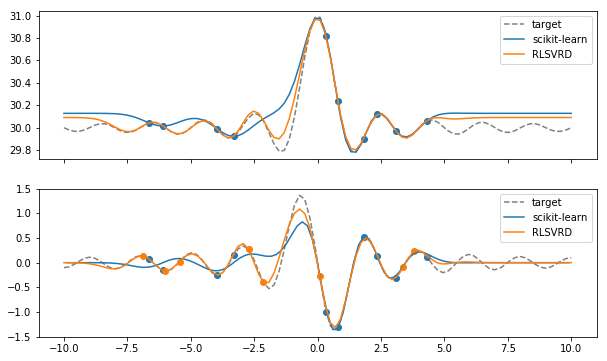

In [12]:
x = np.linspace(-10, 10, 100).reshape((100,1))
delta_x = x[1] - x[0]

fig, (ax0, ax1) = plt.subplots(nrows = 2, figsize = (10, 6), sharex=True)
ax0.scatter(x_train, y_train)
ax0.plot(x, f(x), "--", color = "0.5", label = "target")
if len(x_train) > 0:
    ax0.plot(x, regressor.predict(x), label = "scikit-learn")
ax0.plot(x, RLSVRD.predict(x), label = "RLSVRD")
ax0.legend()

ax1.scatter(x_train, f_prime(x_train))
ax1.scatter(x_prime_train, y_prime_train)
ax1.plot(x, f_prime(x), "--", color = "0.5", label = "target")
if len(x_train) > 0:
    ax1.plot(x[1:] - 0.5*delta_x, np.diff(regressor.predict(x))/delta_x, label = "scikit-learn")
ax1.plot(x, RLSVRD.predict_derivative(x), label = "RLSVRD")
ax1.legend()

# 2D function

In [6]:
def f_2d(x, y):
    return 30 + x*np.sin(y)
def f_2d_dx(x, y):
    return  np.sin(y)
def f_2d_dy(x, y):
    return  x*np.cos(y)

x_2d_train = np.random.uniform(size = (50, 2), low = -3.0, high = 3.0)
y_2d_train = f_2d(x_2d_train[:,0], x_2d_train[:,1])
y_2d_dx_train = f_2d_dx(x_2d_train[:,0], x_2d_train[:,1])
y_2d_dy_train = f_2d_dy(x_2d_train[:,0], x_2d_train[:,1])

In [7]:
if len(x_2d_train) > 0:
    regressor = SVR(C = 10.0**2, epsilon = 0.01, gamma = 1.0)
    regressor.fit(x_2d_train, y_2d_train)
RLSVRD = RLSVRD_regressor(C1 = 10.0**2, C2 = 10.0**2, gamma = 1.0, method = 1)
RLSVRD.fit(x_2d_train, y_2d_train, x_2d_train, np.array([y_2d_dx_train, y_2d_dy_train]).T, plot_matrices = False)

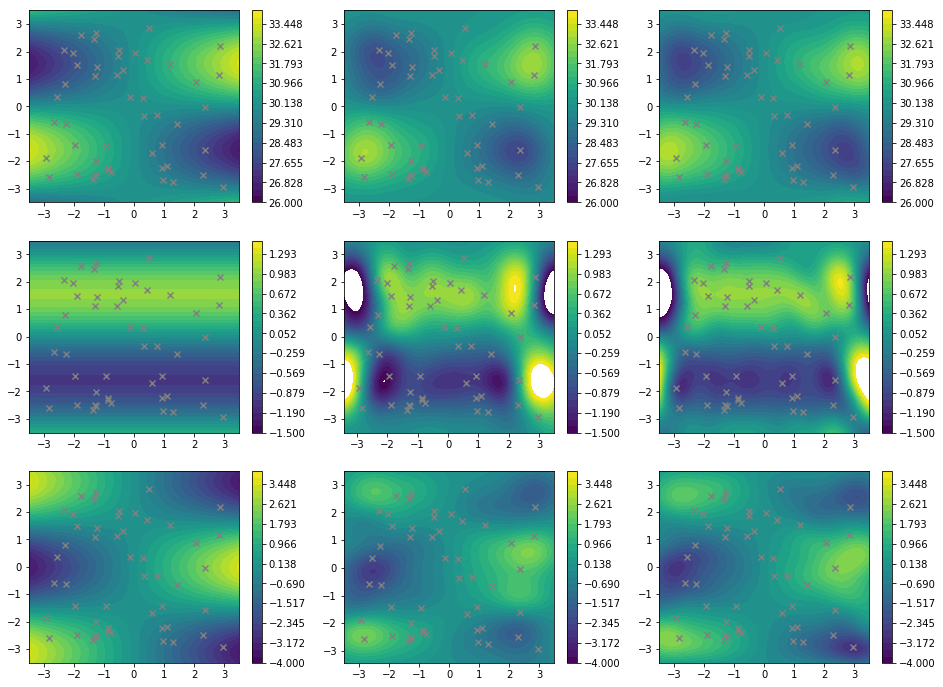

In [8]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(ncols=3, nrows=3, figsize = (16,12))
x, y = np.linspace(-3.5, 3.5, 100), np.linspace(-3.5, 3.5, 100)
delta_x = x[1] - x[0]
delta_y = y[1] - y[0]
xx, yy = np.meshgrid(x, y)
p = ax0.contourf(xx, yy, f_2d(xx, yy), levels = np.linspace(26.0, 34.0, 30))
fig.colorbar(p, ax = ax0)
ax0.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax1.contourf(xx, yy, regressor.predict(np.stack([xx.flatten(), yy.flatten()], axis = 1)).reshape(100, 100), levels = np.linspace(26.0, 34.0, 30))
fig.colorbar(p, ax = ax1)
ax1.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax2.contourf(xx, yy, RLSVRD.predict(np.stack([xx.flatten(), yy.flatten()], axis = 1)).reshape(100, 100), levels = np.linspace(26.0, 34.0, 30))
fig.colorbar(p, ax = ax2)
ax2.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")

p = ax3.contourf(xx, yy, f_2d_dx(xx, yy), levels = np.linspace(-1.5, 1.5, 30))
fig.colorbar(p, ax = ax3)
ax3.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax4.contourf(xx[:,1:], yy[:,1:], np.diff(regressor.predict(np.stack([xx.flatten(), yy.flatten()], axis = 1)).reshape(100, 100), axis = 1)/delta_x, 
                 levels = np.linspace(-1.5, 1.5, 30))
fig.colorbar(p, ax = ax4)
ax4.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax5.contourf(xx, yy, RLSVRD.predict_derivative(np.stack([xx.flatten(), yy.flatten()], axis = 1))[:,0].reshape(100, 100), levels = np.linspace(-1.5, 1.5, 30))
fig.colorbar(p, ax = ax5)
ax5.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")

p = ax6.contourf(xx, yy, f_2d_dy(xx, yy), levels = np.linspace(-4, 4, 30))
fig.colorbar(p, ax = ax6)
ax6.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax7.contourf(xx[1:,:], yy[1:,:], np.diff(regressor.predict(np.stack([xx.flatten(), yy.flatten()], axis = 1)).reshape(100, 100), axis = 0)/delta_y, 
                 levels = np.linspace(-4, 4, 30))
fig.colorbar(p, ax = ax7)
ax7.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")
p = ax8.contourf(xx, yy, RLSVRD.predict_derivative(np.stack([xx.flatten(), yy.flatten()], axis = 1))[:,1].reshape(100, 100), levels = np.linspace(-4, 4, 30))
fig.colorbar(p, ax = ax8)
ax8.scatter(x_2d_train[:,0], x_2d_train[:,1], c = "0.5", marker = "x")